# <font color="darkgreen"> Exercises</font>

In [1]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import wrangle
from wrangle import wrangle_telco
from wrangle import acquire_telco
from wrangle import clean_telco
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [2]:
#prep
train, validate, test = wrangle_telco(split=True)
train.head()

,monthly_charges,tenure,total_charges
customer_id,,,
3396-DKDEL,115.15,70,8250.00
8966-KZXXA,25.10,36,930.95
8857-CUPFQ,19.25,63,1237.65
6901-GOGZG,84.95,60,4984.85
8606-OEGQZ,25.30,18,454.65


**1. Apply the scalers we talked about in this lesson to your data and visualize the results in a way that can.**

array([[<AxesSubplot:title={'center':'monthly_charges'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'total_charges'}>, <AxesSubplot:>]],
      dtype=object)

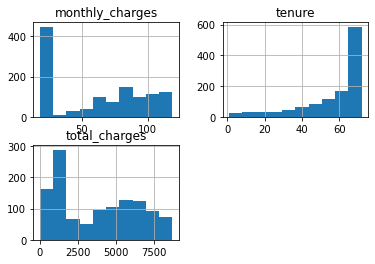

In [3]:
train.hist()

In [4]:
train.monthly_charges.min()

18.4

In [5]:
train.monthly_charges.max()

118.75

In [6]:
train.total_charges.min()

20.45

In [7]:
train.total_charges.max()

8672.45

In [8]:
#Scalers

### <font color="purple">Min-Max Scaler</font>


In [9]:
#make the thing
scaler = sklearn.preprocessing.MinMaxScaler()

In [10]:
# We fit on the training data
# in a way, we treat our scalers like our ML models
# we only .fit on the training data
scaler.fit(train)

MinMaxScaler()

In [11]:
train_scaled = scaler.transform(train)
validate_scaled = scaler.transform(validate)
test_scaled = scaler.transform(test)


In [12]:
train_scaled[0:5]

array([[0.96412556, 0.97183099, 0.95117314],
       [0.06676632, 0.49295775, 0.10523578],
       [0.00847035, 0.87323944, 0.14068423],
       [0.66317887, 0.83098592, 0.57378641],
       [0.06875934, 0.23943662, 0.05018493]])

In [13]:
# turn the numpy arrays into dataframes
train_scaled = pd.DataFrame(train_scaled, columns=train.columns)
validate_scaled = pd.DataFrame(validate_scaled, columns=train.columns)
test_scaled = pd.DataFrame(test_scaled, columns=train.columns)

In [14]:
train_scaled.head()

,monthly_charges,tenure,total_charges
0,0.964126,0.971831,0.951173
1,0.066766,0.492958,0.105236
2,0.008470,0.873239,0.140684
3,0.663179,0.830986,0.573786
4,0.068759,0.239437,0.050185


<AxesSubplot:>

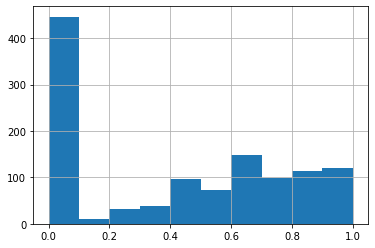

In [15]:
train_scaled.monthly_charges.hist()

<AxesSubplot:>

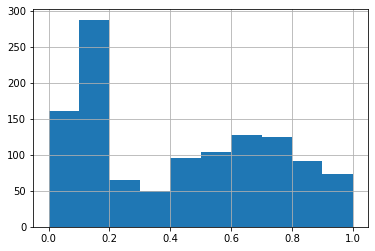

In [16]:
train_scaled.total_charges.hist()

<AxesSubplot:>

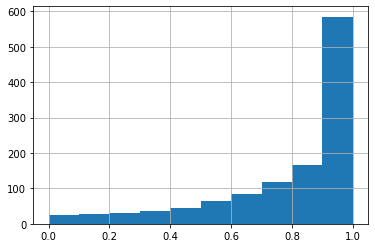

In [17]:
train_scaled.tenure.hist()

array([[<AxesSubplot:title={'center':'monthly_charges'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'total_charges'}>, <AxesSubplot:>]],
      dtype=object)

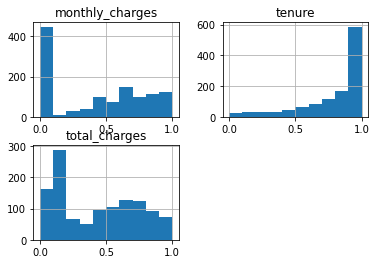

In [18]:
train_scaled.hist()

### <font color='darkcyan'>Standard Scaler</font>

In [19]:
scaler2 = sklearn.preprocessing.StandardScaler()
scaler2.fit(train)

StandardScaler()

In [20]:
standard_train_scaled = scaler2.transform(train)
standard_validate_scaled = scaler2.transform(validate)
standard_test_scaled = scaler2.transform(test)


In [21]:
# turn the numpy arrays into dataframes
standard_train_scaled = pd.DataFrame(standard_train_scaled, columns=train.columns)
standard_validate_scaled = pd.DataFrame(standard_validate_scaled, columns=train.columns)
standard_test_scaled = pd.DataFrame(standard_test_scaled, columns=train.columns)

array([[<AxesSubplot:title={'center':'monthly_charges'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'total_charges'}>, <AxesSubplot:>]],
      dtype=object)

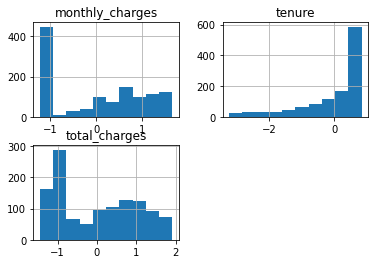

In [22]:
standard_train_scaled.hist()

### <font color='violet'>Robust Scaler</font>

In [23]:
scaler3 = sklearn.preprocessing.RobustScaler()
scaler3.fit(train)

RobustScaler()

In [24]:
rob_train_scaled = scaler3.transform(train)
rob_validate_scaled = scaler3.transform(validate)
rob_test_scaled = scaler3.transform(test)

In [25]:
rob_train_scaled = pd.DataFrame(rob_train_scaled, columns= train.columns)
rob_validate_scaled = pd.DataFrame(rob_validate_scaled, columns= train.columns)
rob_test_scaled =pd.DataFrame(rob_test_scaled, columns = train.columns)


array([[<AxesSubplot:title={'center':'monthly_charges'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'total_charges'}>, <AxesSubplot:>]],
      dtype=object)

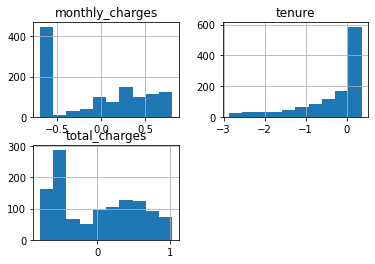

In [26]:
rob_train_scaled.hist()

**2. Apply the `inverse_transform` method to your scaled data. Is the resulting dataset the exact same as the original data?**

In [27]:
train_unscaled = scaler.inverse_transform(train_scaled)
train_unscaled = pd.DataFrame(train_unscaled, columns=train.columns)
train_unscaled.head()

,monthly_charges,tenure,total_charges
0,115.15,70.0,8250.00
1,25.10,36.0,930.95
2,19.25,63.0,1237.65
3,84.95,60.0,4984.85
4,25.30,18.0,454.65


#### ^
<font color="darkgreen">The resulting dataset is the same as the original data</font>

**3. Read the documentation for sklearn's `QuantileTransformer`. Use normal for the `output_distribution` and apply this scaler to your data. Visualize the result of your data scaling.**

In [28]:
quant_scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')
quant_scaler.fit(train)

QuantileTransformer(output_distribution='normal')

In [29]:
train_quant = quant_scaler.transform(train)
train_quant = pd.DataFrame(train_quant, columns = train.columns)

array([[<AxesSubplot:title={'center':'monthly_charges'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'total_charges'}>, <AxesSubplot:>]],
      dtype=object)

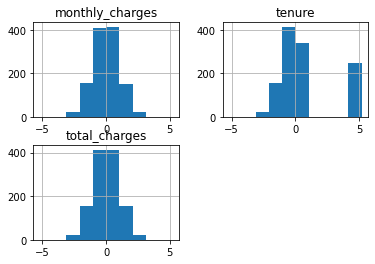

In [30]:
train_quant.hist()

**4. Use the `QuantileTransformer`, but omit the `output_distribution` argument. Visualize your results. What do you notice?**

In [31]:
quant_scaler2 = sklearn.preprocessing.QuantileTransformer()
quant_scaler2.fit(train)

QuantileTransformer()

In [32]:
train_quant2 = quant_scaler2.transform(train)
train_quant2 = pd.DataFrame(train_quant2, columns=train.columns)

array([[<AxesSubplot:title={'center':'monthly_charges'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'total_charges'}>, <AxesSubplot:>]],
      dtype=object)

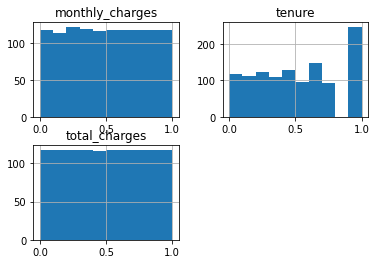

In [33]:
train_quant2.hist()

**5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your `prepare.py` that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!**

In [34]:
def scale_data(train,validate,test):
    '''Accepts train, validate, test data frames and applies min-max scaler
    return: train, validate, test scaled pandas dataframe'''
    
    scaler = sklearn.preprocessing.MinMaxScaler()
    scaler.fit(train)
    
    train_scaled = scaler.transform(train)
    validate_scaled = scaler.transform(validate)
    test_scaled = scaler.transform(test)
    
    train_scaled = pd.DataFrame(train_scaled, columns=train.columns)
    validate_scaled = pd.DataFrame(validate_scaled, columns=train.columns)
    test_scaled = pd.DataFrame(test_scaled, columns=train.columns)
    
    return train_scaled, validate_scaled, test_scaled

In [35]:
#insert border seperation here

## **Post Walkthrough Exercises**

In [36]:
import pandas as pd
import numpy as np
import env
import wrangle
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.model_selection import train_test_split

In [37]:
# data wrangling
df = wrangle.wrangle_telco()

In [38]:
df.head()

,monthly_charges,tenure,total_charges
customer_id,,,
0013-SMEOE,109.70,71,7904.25
0014-BMAQU,84.65,63,5377.80
0016-QLJIS,90.45,65,5957.90
0017-DINOC,45.20,54,2460.55
0017-IUDMW,116.80,72,8456.75


In [39]:
# split the data in train, validate and test
train, test = train_test_split(df, test_size = 0.2, random_state = 123)
train, validate = train_test_split(train, test_size = 0.25, random_state = 123)

In [40]:
#check the shape
train.shape, validate.shape, test.shape

((1011, 3), (337, 3), (337, 3))

In [41]:
train.head()

,monthly_charges,tenure,total_charges
customer_id,,,
7493-GVFIO,20.55,57,1252.85
6374-NTQLP,104.10,72,7447.70
9258-CNWAC,113.65,71,8166.80
2511-ALLCS,24.30,35,821.60
3836-FZSDJ,24.85,71,1901.00


#### **1. Apply the scalers we talked about in this lesson to your data and visualize the results**

In [42]:
# Define the thing
scaler = sklearn.preprocessing.MinMaxScaler()

# Fit the thing
scaler.fit(train[['monthly_charges']])

#transform
scaled = scaler.transform(train[['monthly_charges']])


# single step to fit and transform
scaled = scaler.fit_transform(train[['monthly_charges']])
scaled

array([[0.02142501],
       [0.85401096],
       [0.94917788],
       ...,
       [0.56203288],
       [0.86646736],
       [0.50572995]])

In [43]:
#you can make a new 'scaled' column in original dataframe if you wish
train['monthly_charges_scaled']  = scaled  

In [44]:
train.head()

,monthly_charges,tenure,total_charges,monthly_charges_scaled
customer_id,,,,
7493-GVFIO,20.55,57,1252.85,0.021425
6374-NTQLP,104.10,72,7447.70,0.854011
9258-CNWAC,113.65,71,8166.80,0.949178
2511-ALLCS,24.30,35,821.60,0.058794
3836-FZSDJ,24.85,71,1901.00,0.064275


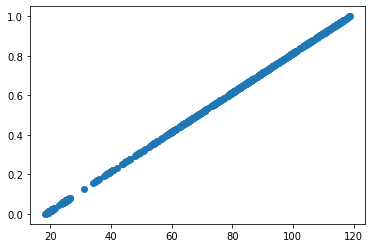

In [45]:
plt.scatter(train.monthly_charges, scaled)

(array([377.,  10.,  29.,  35.,  87.,  63., 124.,  77.,  99., 110.]),
 array([ 18.4  ,  28.435,  38.47 ,  48.505,  58.54 ,  68.575,  78.61 ,
         88.645,  98.68 , 108.715, 118.75 ]),
 <BarContainer object of 10 artists>)

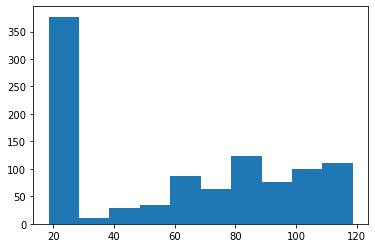

In [46]:
plt.hist(train.monthly_charges)


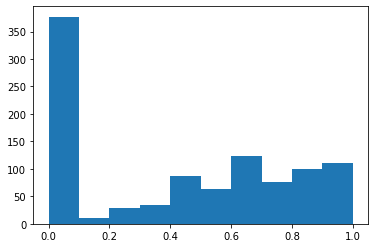

In [47]:
plt.hist(scaled);

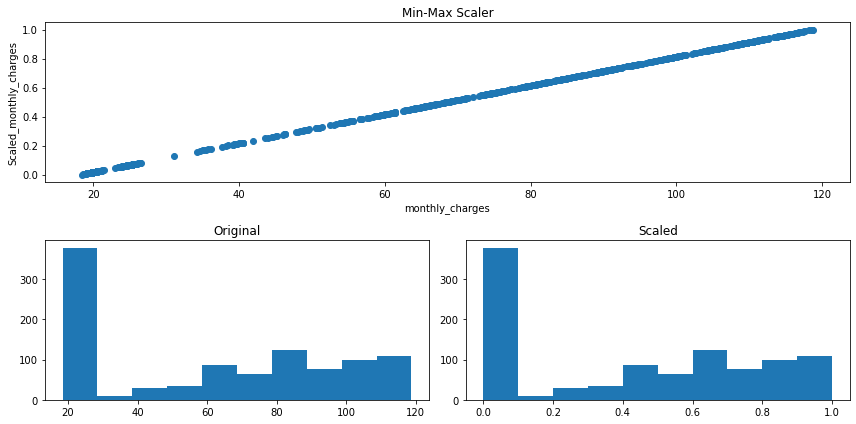

In [48]:
fig = plt.figure(figsize = (12,6))

gs = plt.GridSpec(2,2)

ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

ax1.scatter(train.monthly_charges, scaled)
ax1.set(xlabel = 'monthly_charges', ylabel = 'Scaled_monthly_charges', title = 'Min-Max Scaler')

ax2.hist(train.monthly_charges)
ax2.set(title = 'Original')

ax3.hist(scaled)
ax3.set(title = 'Scaled')
plt.tight_layout();

In [49]:
def visualize_scaled_date(scaler, scaler_name, feature):
    scaled = scaler.fit_transform(train[[feature]])
    fig = plt.figure(figsize = (12,6))

    gs = plt.GridSpec(2,2)

    ax1 = fig.add_subplot(gs[0, :])
    ax2 = fig.add_subplot(gs[1,0])
    ax3 = fig.add_subplot(gs[1,1])

    ax1.scatter(train[[feature]], scaled)
    ax1.set(xlabel = feature, ylabel = 'Scaled_' + feature, title = scaler_name)

    ax2.hist(train[[feature]])
    ax2.set(title = 'Original')

    ax3.hist(scaled)
    ax3.set(title = 'Scaled')
    plt.tight_layout();


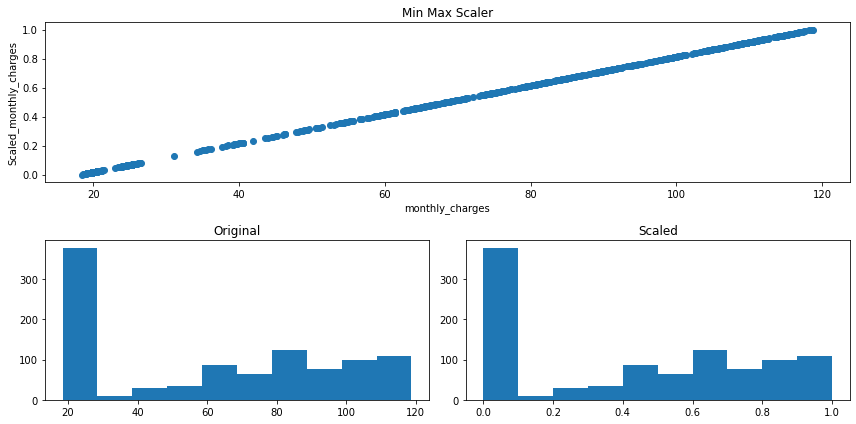

In [50]:
visualize_scaled_date(sklearn.preprocessing.MinMaxScaler(), 'Min Max Scaler', 'monthly_charges')

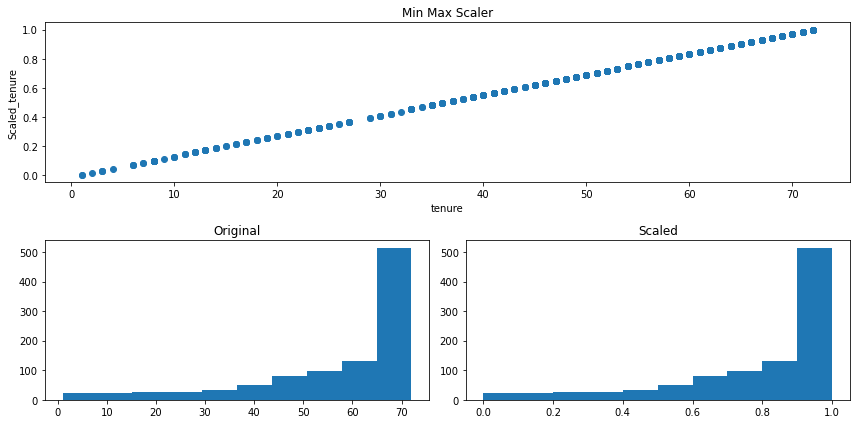

In [51]:
visualize_scaled_date(sklearn.preprocessing.MinMaxScaler(), 'Min Max Scaler', 'tenure')

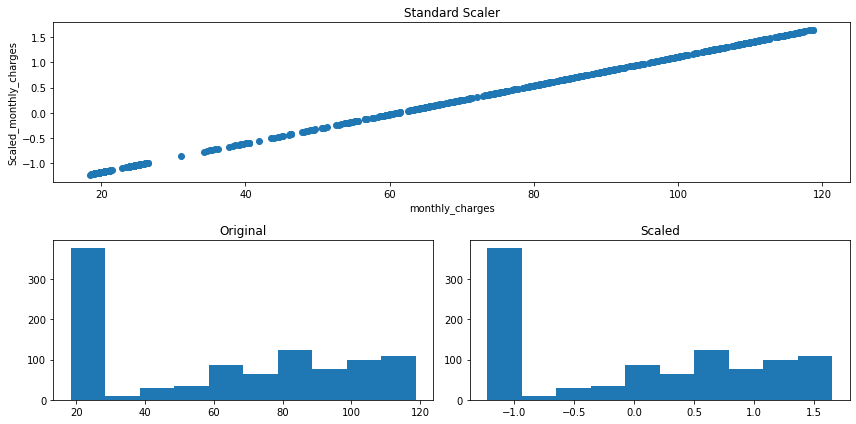

In [52]:
visualize_scaled_date(sklearn.preprocessing.StandardScaler(), 'Standard Scaler', 'monthly_charges')

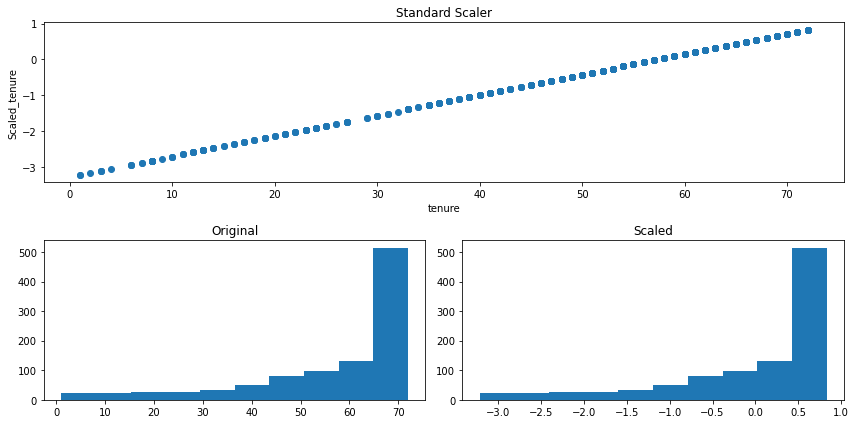

In [53]:
visualize_scaled_date(sklearn.preprocessing.StandardScaler(), 'Standard Scaler', 'tenure')

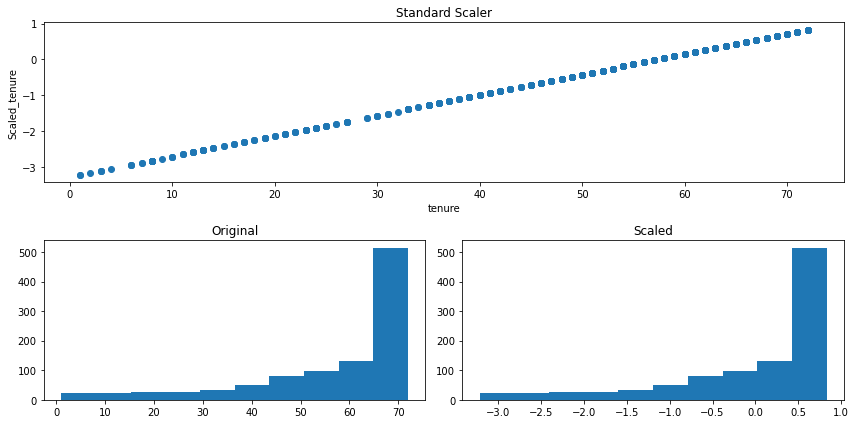

In [54]:
visualize_scaled_date(sklearn.preprocessing.StandardScaler(), 'Standard Scaler', 'tenure')

### 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [57]:
train.head()

,monthly_charges,tenure,total_charges,monthly_charges_scaled
customer_id,,,,
7493-GVFIO,20.55,57,1252.85,0.021425
6374-NTQLP,104.10,72,7447.70,0.854011
9258-CNWAC,113.65,71,8166.80,0.949178
2511-ALLCS,24.30,35,821.60,0.058794
3836-FZSDJ,24.85,71,1901.00,0.064275


In [58]:
scaler = sklearn.preprocessing.MinMaxScaler()

scaled = scaler.fit_transform(train[['monthly_charges', 'tenure']])
scaled

array([[0.02142501, 0.78873239],
       [0.85401096, 1.        ],
       [0.94917788, 0.98591549],
       ...,
       [0.56203288, 0.90140845],
       [0.86646736, 0.95774648],
       [0.50572995, 0.47887324]])

In [59]:
scaled_df = pd.DataFrame(scaled, index = train.index, columns = ['monthly_charges', 'tenure'])

In [60]:
scaler.inverse_transform(scaled_df)

array([[ 20.55,  57.  ],
       [104.1 ,  72.  ],
       [113.65,  71.  ],
       ...,
       [ 74.8 ,  65.  ],
       [105.35,  69.  ],
       [ 69.15,  35.  ]])

In [61]:
scaled_df = pd.DataFrame(scaler.inverse_transform(scaled), index = train.index, columns = ['monthly_charges', 'tenure'])

### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

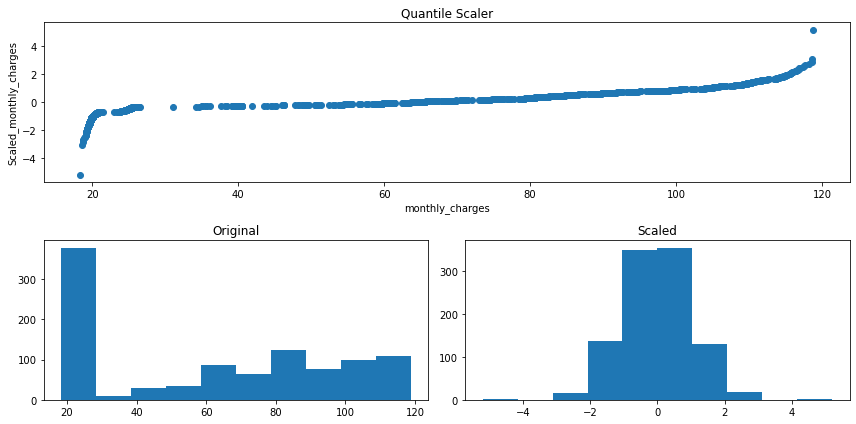

In [62]:
visualize_scaled_date(sklearn.preprocessing.QuantileTransformer(output_distribution='normal'), 'Quantile Scaler', 'monthly_charges')

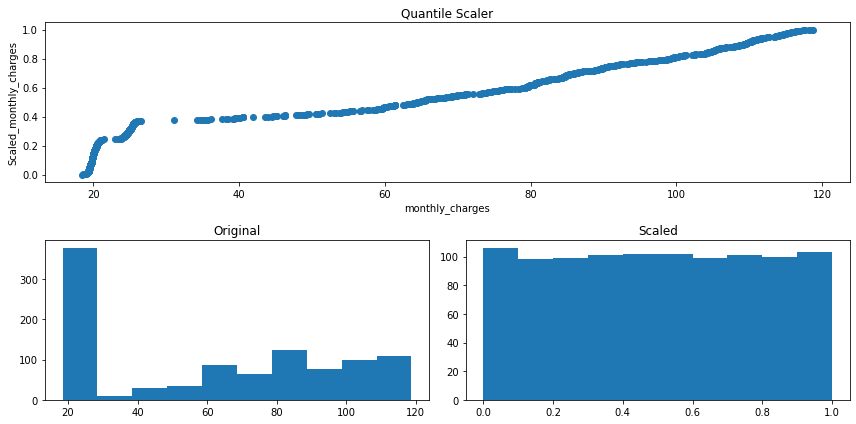

In [63]:
visualize_scaled_date(sklearn.preprocessing.QuantileTransformer(), 'Quantile Scaler', 'monthly_charges')

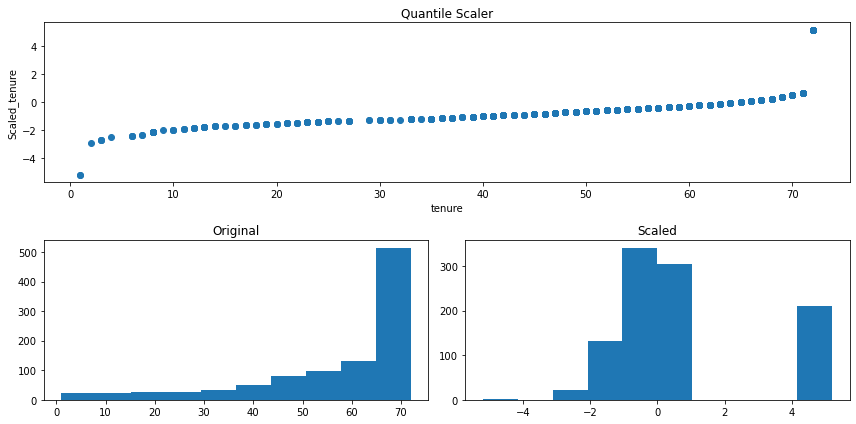

In [64]:
visualize_scaled_date(sklearn.preprocessing.QuantileTransformer(output_distribution='normal'), 'Quantile Scaler', 'tenure')

### 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [65]:
def Standard_Scaler(X_train, X_validate, X_test):
    """
    Takes in X_train, X_validate and X_test dfs with numeric values only
    Returns scaler, X_train_scaled, X_validate_scaled, X_test_scaled dfs
    """

    scaler = sklearn.preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
    X_validate_scaled = pd.DataFrame(scaler.transform(X_validate), index = X_validate.index, columns = X_validate.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)
    
    return scaler, X_train_scaled, X_validate_scaled, X_test_scaled

In [66]:
def Min_Max_Scaler(X_train, X_validate, X_test):
    """
    Takes in X_train, X_validate and X_test dfs with numeric values only
    Returns scaler, X_train_scaled, X_validate_scaled, X_test_scaled dfs 
    """
    scaler = sklearn.preprocessing.MinMaxScaler().fit(X_train)
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
    X_validate_scaled = pd.DataFrame(scaler.transform(X_validate), index = X_validate.index, columns = X_validate.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)
    
    return scaler, X_train_scaled, X_validate_scaled, X_test_scaled

In [67]:
X_train = train[['monthly_charges', 'tenure']]
X_validate = test[['monthly_charges', 'tenure']]
X_test = test[['monthly_charges', 'tenure']]

In [68]:
# Use the Standard_Scaler Function defined above

scaler, X_train_scaled, X_validate_scaled, X_test_scaled = Standard_Scaler(X_train, X_validate, X_test)

X_train_scaled.head()

,monthly_charges,tenure
customer_id,,
7493-GVFIO,-1.164231,-0.024491
6374-NTQLP,1.230890,0.831297
9258-CNWAC,1.504659,0.774244
2511-ALLCS,-1.056730,-1.279648
3836-FZSDJ,-1.040964,0.774244


## Effect of outliers on scaling 

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

In [70]:
# connection function for accessing mysql 
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

query = """
select * 
from properties_2017
join predictions_2017 using(parcelid)
where transactiondate between "2017-05-01" and "2017-06-30";
"""

df = pd.read_sql(query, get_connection('zillow'))
df.head()

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id,logerror,transactiondate
0,11393337,2463969,NaN,NaN,NaN,3.0,3.0,NaN,4.0,3.0,...,43439.0,2016.0,22755.0,756.94,Y,14.0,6.037235e+13,117,0.086137,2017-06-08
1,11289917,2061546,1.0,NaN,NaN,2.0,3.0,NaN,6.0,2.0,...,136104.0,2016.0,27214.0,2319.90,Y,15.0,6.037901e+13,1248,-0.362001,2017-06-23
2,11705026,1834372,NaN,NaN,NaN,1.0,2.0,NaN,6.0,1.0,...,35606.0,2016.0,23624.0,543.69,None,NaN,6.037232e+13,1772,-0.146056,2017-06-30
3,14269464,1923117,NaN,NaN,NaN,3.0,4.0,NaN,NaN,3.0,...,880456.0,2016.0,445569.0,9819.72,None,NaN,6.059064e+13,2028,0.021085,2017-06-01
4,11389003,2121349,NaN,NaN,NaN,2.0,3.0,NaN,6.0,2.0,...,614000.0,2016.0,449000.0,7673.19,None,NaN,6.037703e+13,3273,-0.325393,2017-06-01


In [71]:
# Some prep
df = df.rename(columns={"bedroomcnt": "bedrooms", "bathroomcnt": "bathrooms", "calculatedfinishedsquarefeet": "square_feet", "taxamount": "taxes", "taxvaluedollarcnt": "tax_value"})

In [74]:
# Let's drop the nulls
df = df.dropna()
df.head()

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathrooms,bedrooms,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,tax_value,assessmentyear,landtaxvaluedollarcnt,taxes,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id,logerror,transactiondate


In [75]:
# split the data in train, validate and test
train, test = train_test_split(df, test_size = 0.2, random_state = 123)
train, validate = train_test_split(train, test_size = 0.25, random_state = 123)

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
#Train dataframe, but with outliers removed
train_no_outliers = train[train.tax_value <= 2_000_000]